<a href="https://colab.research.google.com/github/intuinno/legged_gym/blob/skinner04/notebook/skinner_camera_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/hello_world_tutorial.ipynb)

# Checking the HSV value

Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org).

This is the first tutorial that show how one can simply start loading images with [Torchvision](https://pytorch.org/vision), [Kornia](https://kornia.org) and [OpenCV](https://opencv.org).


In [2]:
%%capture
!pip install kornia

In [3]:
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

## Load an image with Torchvision

The images can be also loaded using `torchvision` which directly returns the images in a `torch.Tensor` in the shape `(C,H,W)`.



In [41]:
img_name = "262.png"

x_rgba: torch.tensor = torchvision.io.read_image(img_name)  # CxHxW / torch.uint8
x_rgba = x_rgba.unsqueeze(0)  # BxCxHxW
print(x_rgba.shape)

torch.Size([1, 4, 120, 160])


## Load an image with Kornia

With Kornia we can do all the preceding.

We have a couple of utilities to cast the image to a `torch.Tensor` to make it compliant to the other Kornia components and arrange the data in `(B,C,H,W)`.  

 The utility is [`kornia.image_to_tensor`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which casts a `numpy.ndarray` to a `torch.Tensor` and permutes the channels to leave the image ready for being used with any other PyTorch or Kornia component.  
The image is casted into a 4D `torch.Tensor` with zero-copy.



We can convert from BGR to RGB with a [`kornia.color`](https://kornia.readthedocs.io/en/latest/color.html) component.


## Visualize an image with Matplotib

In [5]:
# x_rgb: torch.tensor = K.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8
x_rgb = K.color.rgba_to_rgb(x_rgba/255.)


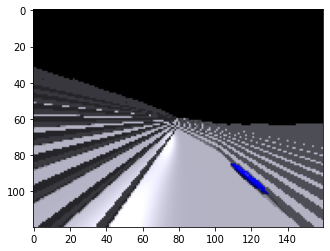

In [6]:
img_x_rgb = K.tensor_to_image(x_rgb)
plt.imshow(img_x_rgb)

In [31]:
x_hsv = K.color.rgb_to_hsv(x_rgb)
x_hsv.shape

torch.Size([1, 3, 120, 160])

torch.Size([1, 120, 160])
tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0565, 0.0570, 0.0573,
        0.0580, 0.0588, 0.0591, 0.0599, 0.0602, 0.0613, 0.0614, 0.0616, 0.0622,
        0.0627, 0.0628, 0.0631, 0.0633, 0.0645, 0.0650, 0.0660, 0.0667, 0.0670,
        0.0672, 0.0672, 0.0675, 0.0677, 0.0677, 0.0678, 0.0680, 0.0685, 0.0688,
        0.0690, 0.0691, 0.0694, 0.0695, 0.0696, 0.0697, 0.0700, 0.0702, 0.0704,
        0.0705, 0.0706, 0.0707, 0.0708, 0.0709, 0.0711, 0.0711, 0.0714, 0.0717,
        0.0717, 0.0720, 0.0720, 0.0723, 0.0723, 0.0726, 0.0726, 0.0727, 0.0729,
        0.0730, 0.0732, 0.0733, 0.0734, 0.0735, 0.0736, 0.0738, 0.0739, 0.0741,
        0.0742, 0.0744, 0.0746, 0.0747, 0.0749, 0.0750, 0.0752, 0.0753, 0.0756,
        0.0756, 0.0757, 0.0759, 0.0759, 0.0762, 0.0763, 0.0766, 0.0766, 0.0769,
        0.0773, 0.0773, 0.0776, 0.0776, 0.0777, 0.0779, 0.0780, 0.0783, 0.0783,
        0.0786

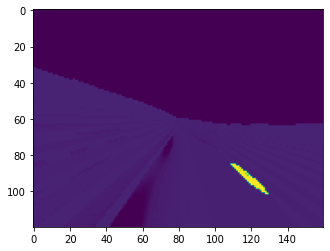

In [34]:
saturation = x_hsv[:,1,:,:]
hue = x_hsv[:,0,:,:]
value = x_hsv[:,2,:,:]
print(saturation.shape)
print(saturation.unique())
plt.imshow(saturation.squeeze())

tensor([0.0000, 4.1888])


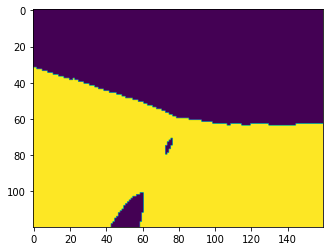

In [35]:
print(hue.unique())
plt.imshow(hue.squeeze())

torch.Size([1, 120, 160])
tensor([0.0000, 0.1608, 0.2392, 0.2431, 0.2471, 0.2627, 0.3255, 0.3333, 0.3412,
        0.3451, 0.3490, 0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765,
        0.3804, 0.3843, 0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4157,
        0.4275, 0.4314, 0.4353, 0.4392, 0.4471, 0.4510, 0.4549, 0.4627, 0.4667,
        0.4706, 0.5059, 0.5294, 0.5373, 0.5490, 0.5686, 0.5725, 0.5765, 0.5804,
        0.5843, 0.5882, 0.5961, 0.6039, 0.6078, 0.6118, 0.6157, 0.6196, 0.6235,
        0.6275, 0.6314, 0.6353, 0.6392, 0.6431, 0.6471, 0.6588, 0.6627, 0.6706,
        0.6745, 0.6941, 0.7176, 0.7255, 0.7333, 0.7412, 0.7490, 0.7529, 0.7608,
        0.7686, 0.7725, 0.7765, 0.7804, 0.7843, 0.7882, 0.7922, 0.7961, 0.8000,
        0.8039, 0.8078, 0.8118, 0.8157, 0.8196, 0.8235, 0.8275, 0.8314, 0.8353,
        0.8392, 0.8431, 0.8471, 0.8510, 0.8549, 0.8588, 0.8627, 0.8667, 0.8706,
        0.8745, 0.8784, 0.8824, 0.8863, 0.8902, 0.8941, 0.8980, 0.9020, 0.9059,
        0.9098

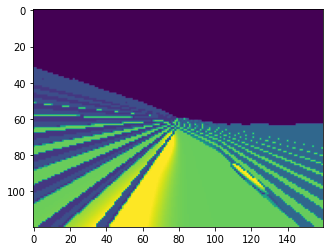

In [36]:
print(value.shape)
print(value.unique())

plt.imshow(value.squeeze())

In [23]:
a = torch.where(saturation > 0.4, torch.tensor([1.]), torch.tensor([0.]))

In [17]:
img_a = K.tensor_to_image(a)

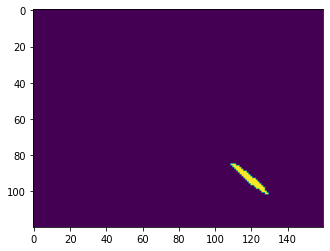

In [18]:
plt.imshow(img_a)

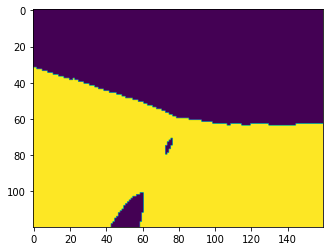

We will use [Matplotlib](https://matplotlib.org/) for the visualisation inside the notebook. Matplotlib requires a `numpy.ndarray` in the `(H,W,C)` format, and for doing so we will go back with [`kornia.tensor_to_image`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which will convert the image to the correct format.



Create a subplot to visualize the original an a modified image



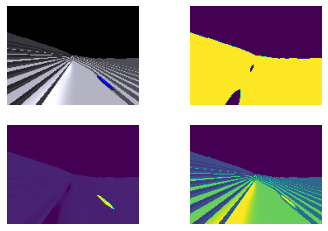

In [40]:
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_x_rgb)

axs[1].axis('off')
axs[1].imshow(hue.squeeze())

axs[2].axis('off')
axs[2].imshow(saturation.squeeze())

axs[3].axis('off')
axs[3].imshow(value.squeeze())

plt.show()

In [56]:
import os
import matplotlib

directory = 'files'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

LEGGED_GYM_ROOT_DIR = "legged"
save_camera_time_str = "1"
img_idx = 260

path = os.path.join(LEGGED_GYM_ROOT_DIR, 'logs', 'camera_frames', save_camera_time_str)
os.makedirs(path, exist_ok=True)
filename = os.path.join(LEGGED_GYM_ROOT_DIR, 'logs', 'camera_frames', save_camera_time_str, f"{img_idx}.png")

cam_img = hue.numpy().squeeze()

matplotlib.image.imsave(filename, cam_img)

 

OSError: ignored

In [58]:
cam_img.shape

(120, 160)

In [59]:
im

OSError: ignored

<PIL.Image.Image image mode=F size=160x120 at 0x7F887E65DB10>